## Subtask 2: Building and Testing our own Detector
In this subtask, we have created our cascade trained with 500 images of a dartboard in different angles and orientations and 500 non-dartboard images. We use this cascade with the Viola-Jones framework to create our own dartboard detector.

Enter folder path (eg.'../images/'): ../images/


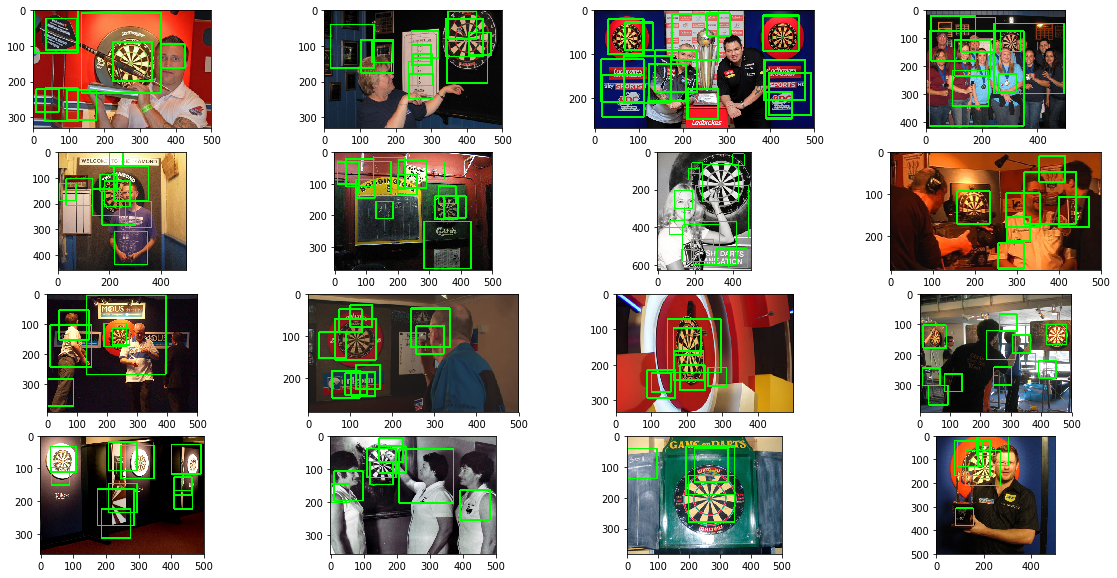

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as pylab
from os import listdir
from os.path import isfile, join


mypath = str(input("Enter folder path (eg.'../images/'): "))

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

pylab.rcParams['figure.figsize'] = (20,10)


def imshow(image):
    #OpenCV stores images in BGR so we have to convert to RGB to display it using matplotlib
    imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imagergb)

def imresize (image):
    hh, ww, dd = image.shape
    imscale = 500/ww
    newX, newY = image.shape[1]*imscale, image.shape[0]*imscale
    newimage = cv2.resize(image, (int(newX), int(newY)))
    return newimage

obj_classifier = cv2.CascadeClassifier('classifier/dartcascade/cascade.xml')

fig = plt.figure()
#number of test images
N=len(onlyfiles)

for i in range (0,N):
    #load image
    location = mypath + onlyfiles[i]
    image = cv2.imread(location)
    image = imresize(image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #run classifier
    obj = obj_classifier.detectMultiScale(gray, 1.1, 1, 0|cv2.CASCADE_SCALE_IMAGE, (50,50), (500,500))

    #check if emppty
    if obj is ():
        print('No objects found in ' + str("dart") + str(i) + str(".jpg"))

    # Visualise classifier: Draw box by iteration
    for (x,y,w,h) in obj:
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 3)

    saveloc = "dartclassified/" + onlyfiles[i]
    cv2.imwrite(saveloc,image)
    cols = 4
    rows = math.ceil(N/cols)
    ax = fig.add_subplot(rows, cols, i+1)
    imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(imagergb)
# imshow(image)
#cv2.imwrite('detected.jpg', detected)
#cv2.destroyAllWindows()
